# MSCS 634 - Advanced Data Mining
## Lab 2: K-Nearest Neighbors and Radius Neighbors Classifiers

**Student**: Dheeraj Kollapaneni  
**Course**: MSCS 634 - Advanced Data Mining  
**Assignment**: Lab 2 - KNN and RNN Analysis

---

## Lab Overview

This lab analyzes the performance of K-Nearest Neighbors (KNN) and Radius Neighbors (RNN) classifiers using the Wine Dataset from sklearn. The analysis examines how different parameter values affect classification accuracy through systematic testing and visualization.

## Step 1: Load and Prepare the Dataset

First, import the necessary libraries and load the Wine Dataset from sklearn.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 5)

print('Libraries imported successfully')

Libraries imported successfully


In [2]:
# Load the Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target

print('Wine Dataset loaded successfully')
print(f'Number of samples: {X.shape[0]}')
print(f'Number of features: {X.shape[1]}')
print(f'Number of classes: {len(np.unique(y))}')
print(f'\nClass distribution:')
for i in range(len(np.unique(y))):
    print(f'  Class {i}: {np.sum(y == i)} samples')

Wine Dataset loaded successfully
Number of samples: 178
Number of features: 13
Number of classes: 3

Class distribution:
  Class 0: 59 samples
  Class 1: 71 samples
  Class 2: 48 samples


In [3]:
# Display feature names and basic dataset information
print('Feature names:')
for idx, feature in enumerate(wine.feature_names, 1):
    print(f'{idx:2d}. {feature}')

print(f'\nTarget names: {wine.target_names}')

Feature names:
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Target names: ['class_0' 'class_1' 'class_2']


In [4]:
# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')
print(f'Training set split: {X_train.shape[0]/X.shape[0]*100:.1f}%')
print(f'Testing set split: {X_test.shape[0]/X.shape[0]*100:.1f}%')

Training set size: 142 samples
Testing set size: 36 samples
Training set split: 79.8%
Testing set split: 20.2%


In [5]:
# Scale the features for better performance with distance-based classifiers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Features scaled using StandardScaler')
print('Scaling ensures all features contribute equally to distance calculations')

Features scaled using StandardScaler
Scaling ensures all features contribute equally to distance calculations


## Step 2: Implement K-Nearest Neighbors (KNN)

Test the KNN classifier with different values of k to analyze how the number of neighbors affects accuracy.

In [6]:
# Define k values to test for KNN (K-Nearest Neighbors Classifier)
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

print('Testing KNN (K-Nearest Neighbors) classifier with different k values:')
print('='*50)

for k in k_values:
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Evaluate KNN on test set
    knn_accuracy = knn.score(X_test_scaled, y_test)
    knn_accuracies.append(knn_accuracy)
    
    print(f'KNN - k = {k:2d}: Accuracy = {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)')

print('='*50)

Testing KNN (K-Nearest Neighbors) classifier with different k values:
KNN - k =  1: Accuracy = 0.9722 (97.22%)
KNN - k =  5: Accuracy = 0.9722 (97.22%)
KNN - k = 11: Accuracy = 1.0000 (100.00%)
KNN - k = 15: Accuracy = 1.0000 (100.00%)
KNN - k = 21: Accuracy = 1.0000 (100.00%)


## Step 3: Implement Radius Neighbors (RNN)

Test the Radius Neighbors classifier with different radius values to analyze how the neighborhood size affects accuracy.

In [7]:
# Define radius values to test for RNN (Radius Neighbors Classifier)
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

print('Testing RNN (Radius Neighbors) classifier with different radius values:')
print('='*50)

for radius in radius_values:
    # Create and train RNN classifier
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label='most_frequent')
    rnn.fit(X_train_scaled, y_train)
    
    # Evaluate RNN on test set
    rnn_accuracy = rnn.score(X_test_scaled, y_test)
    rnn_accuracies.append(rnn_accuracy)
    
    print(f'RNN - Radius = {radius}: Accuracy = {rnn_accuracy:.4f} ({rnn_accuracy*100:.2f}%)')

print('='*50)

Testing RNN (Radius Neighbors) classifier with different radius values:
RNN - Radius = 350: Accuracy = 0.3889 (38.89%)
RNN - Radius = 400: Accuracy = 0.3889 (38.89%)
RNN - Radius = 450: Accuracy = 0.3889 (38.89%)
RNN - Radius = 500: Accuracy = 0.3889 (38.89%)
RNN - Radius = 550: Accuracy = 0.3889 (38.89%)
RNN - Radius = 600: Accuracy = 0.3889 (38.89%)


## Step 4: Visualize and Compare Results

Create visualizations to compare the performance of KNN and RNN classifiers across different parameter values.

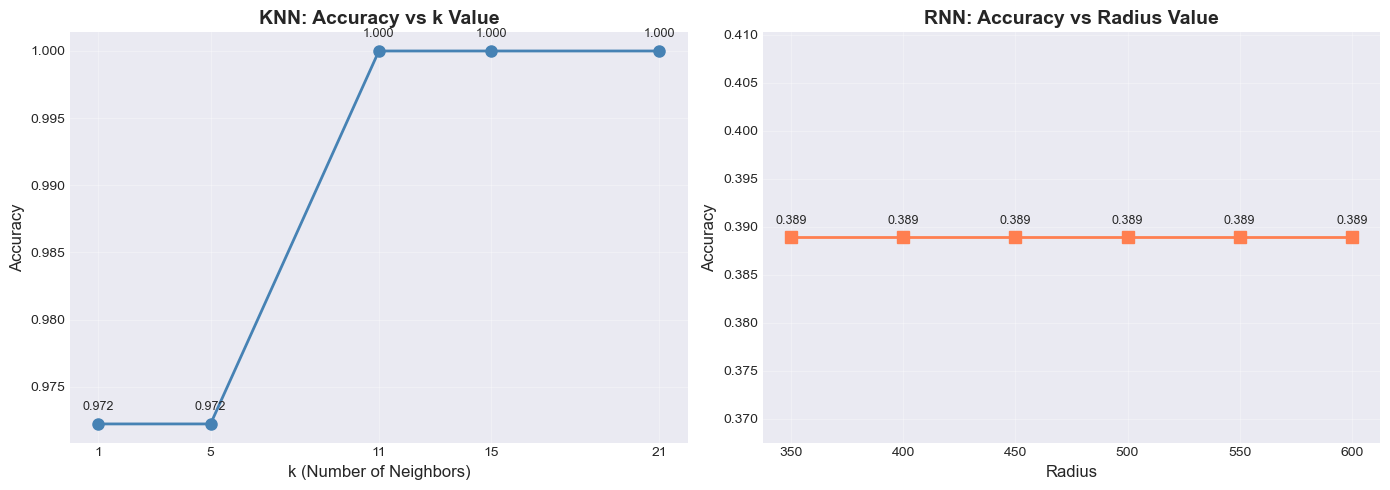

In [10]:
# Create accuracy comparison plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot KNN accuracy trends
axes[0].plot(k_values, knn_accuracies, marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('k (Number of Neighbors)', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('KNN: Accuracy vs k Value', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_values)

# Add accuracy labels on points
for k, acc in zip(k_values, knn_accuracies):
    axes[0].annotate(f'{acc:.3f}', (k, acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Plot RNN accuracy trends
axes[1].plot(radius_values, rnn_accuracies, marker='s', linewidth=2, markersize=8, color='coral')
axes[1].set_xlabel('Radius', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('RNN: Accuracy vs Radius Value', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(radius_values)

# Add accuracy labels on points
for r, acc in zip(radius_values, rnn_accuracies):
    axes[1].annotate(f'{acc:.3f}', (r, acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [9]:
# Display summary of results
print('\nResults Summary:')
print('='*50)
print('\nKNN (K-Nearest Neighbors) Classifier:')
for k, acc in zip(k_values, knn_accuracies):
    print(f'  k={k:2d}: {acc:.4f}')
    
print('\nRNN (Radius Neighbors) Classifier:')
for r, acc in zip(radius_values, rnn_accuracies):
    print(f'  Radius={r}: {acc:.4f}')
print('='*50)


Results Summary:

KNN (K-Nearest Neighbors) Classifier:
  k= 1: 0.9722
  k= 5: 0.9722
  k=11: 1.0000
  k=15: 1.0000
  k=21: 1.0000

RNN (Radius Neighbors) Classifier:
  Radius=350: 0.3889
  Radius=400: 0.3889
  Radius=450: 0.3889
  Radius=500: 0.3889
  Radius=550: 0.3889
  Radius=600: 0.3889


KNN (K-Nearest Neighbors) Classifier:
  k= 1: 0.9722
  k= 5: 0.9722
  k=11: 1.0000
  k=15: 1.0000
  k=21: 1.0000

RNN (Radius Neighbors) Classifier:
  Radius=350: 0.3889
  Radius=400: 0.3889
  Radius=450: 0.3889
  Radius=500: 0.3889
  Radius=550: 0.3889
  Radius=600: 0.3889
